In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples

In [3]:
movies = pd.read_csv("../../movie_metadata.csv");

## Q1

Plot the histogram of movie durations. Note: plot only movies with a duration of less than or equal to 240 minutes. Use a bin size of 30.

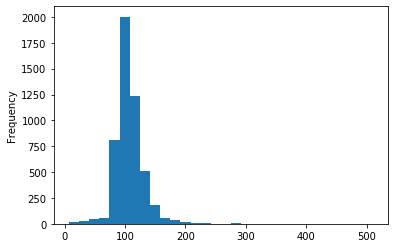

In [4]:
movies.duration.plot.hist(bins=30)

## Q2

Generate a side-by-side box plot to show the distribution of the number of critic reviews on four rating categories: PG-13, PG, G, and R. What insights can you get from the plot?

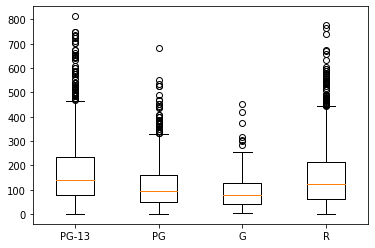

In [5]:
pg_thirteen_movies_critic_reviews = list(movies.loc[movies['content_rating'] == 'PG-13']['num_critic_for_reviews'])
pg_thirteen_movies_critic_reviews = list(filter(lambda x: (not np.isnan(x)), pg_thirteen_movies_critic_reviews))

pg_movies_critic_reviews = list(movies.loc[movies['content_rating'] == 'PG']['num_critic_for_reviews'])
pg_movies_critic_reviews = list(filter(lambda x: (not np.isnan(x)), pg_movies_critic_reviews))

g_movies_critic_reviews = list(movies.loc[movies['content_rating'] == 'G']['num_critic_for_reviews'])
g_movies_critic_reviews = list(filter(lambda x: (not np.isnan(x)), g_movies_critic_reviews))

r_movies_critic_reviews = list(movies.loc[movies['content_rating'] == 'R']['num_critic_for_reviews'])
r_movies_critic_reviews = list(filter(lambda x: (not np.isnan(x)), r_movies_critic_reviews))

plt.boxplot([pg_thirteen_movies_critic_reviews, pg_movies_critic_reviews, g_movies_critic_reviews, r_movies_critic_reviews])
plt.xticks([1, 2, 3, 4], ['PG-13', 'PG', 'G', 'R'])
plt.show()

## Q3

We want to specifically compare the distribution of the number of critic review on two rating categories: R and PG-13. Generate a QQ plot and make comparisons on the two distribution from the plot. What insights can you get from the plot?

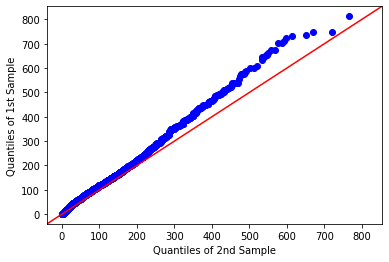

In [6]:
pg_thirteen_movies_critic_reviews = list(movies.loc[movies['content_rating'] == 'PG-13']['num_critic_for_reviews'])
pg_thirteen_movies_critic_reviews = list(filter(lambda x: (not np.isnan(x)), pg_thirteen_movies_critic_reviews))
pg_thirteen_movies_critic_reviews = sm.ProbPlot(np.array(pg_thirteen_movies_critic_reviews))

r_movies_critic_reviews = list(movies.loc[movies['content_rating'] == 'R']['num_critic_for_reviews'])
r_movies_critic_reviews = list(filter(lambda x: (not np.isnan(x)), r_movies_critic_reviews))
r_movies_critic_reviews = sm.ProbPlot(np.array(r_movies_critic_reviews))

qqplot_2samples(pg_thirteen_movies_critic_reviews, r_movies_critic_reviews, line='45')
plt.show()

## Q4

Now we pay our attention to movies that are rated as 'G'.  Generate a scatter plot on the number of critic reviews and the number of user reviews. Use colors to show the IMDb scores. What insights can you get from the plot?

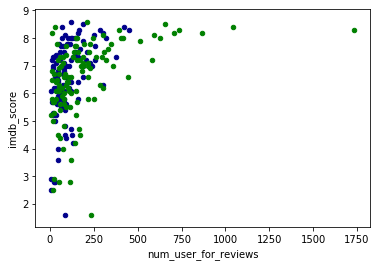

In [17]:
g_movies = movies.loc[movies['content_rating'] == 'G']

ax1 = g_movies.plot.scatter(x='num_critic_for_reviews', y='imdb_score', c='DarkBlue')
ax2 = g_movies.plot.scatter(x='num_user_for_reviews', y='imdb_score', color='g', ax=ax1) 